In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

初始化数据$X\in R^{|D|\times (k+1)},Y\in R^{|D|\times 1},W\in R^{(k+1)\times 1}$

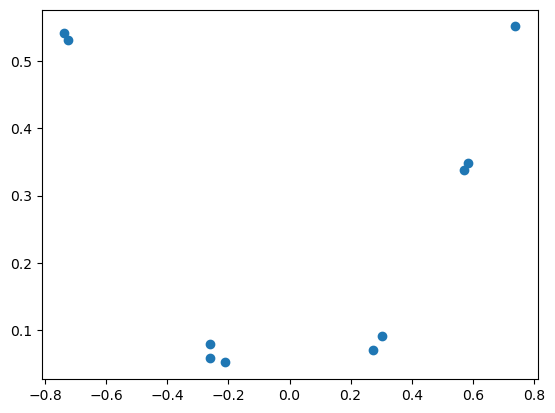

In [3]:
D = 10
x = (np.random.rand(1,D)-0.5)*2 # x in [-1,1]
epsilon = np.random.normal(0,0.01,(1,D)) # epsilon with μ=0,σ=0.01
y = x**2 + epsilon

plt.scatter(x[0],y[0])
plt.show()

In [4]:
# 设置K = 
k = 10

# MSE$\to$ LSM
$\arg\min_{W}||XW-Y||_F^2$\\
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y=0$

In [5]:
Y = y.T

order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D]) # 将order扩展
XT = np.power(x, e)  # 计算得到X
X = np.transpose(XT) 

a = np.matmul(XT, X) 
b = np.matmul(XT, Y) 
W = np.linalg.solve(a,b) 

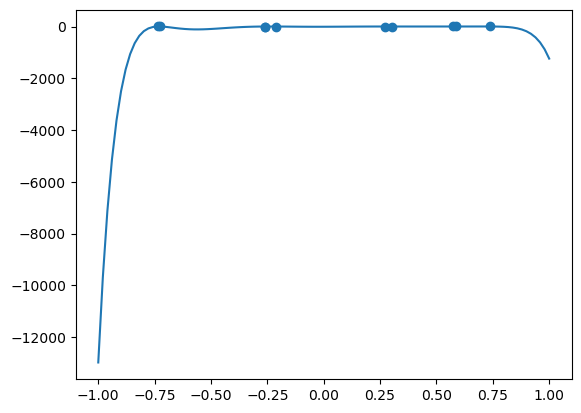

In [6]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

# +L_2 norm
增加L2范数形式 $\arg\min_{W}||XW-Y||_F^2+\lambda ||W||_2^2$\\
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y=0\to W = (X^TX+\lambda I)^{-1}X^TY$

In [7]:
k = 10
Y = y.T
lambda_ = 0.1

order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D])
XT = np.power(x, e)
X = np.transpose(XT)

a = np.matmul(XT, X) + lambda_*np.identity(k+1)
b = np.matmul(XT, Y) 
W = np.linalg.solve(a,b) 

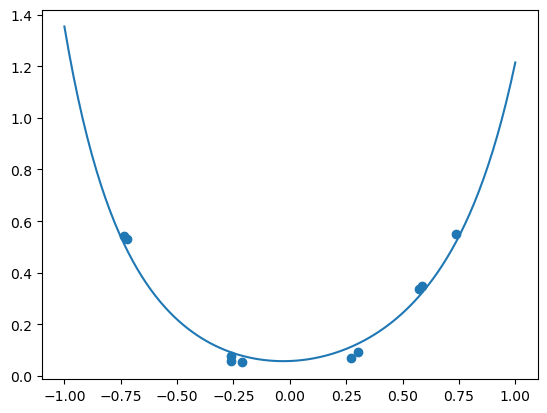

In [8]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

In [9]:
W

array([[ 0.05791097],
       [ 0.0352046 ],
       [ 0.59839355],
       [-0.03089281],
       [ 0.32989523],
       [-0.03432534],
       [ 0.16739979],
       [-0.02458311],
       [ 0.08572201],
       [-0.0151141 ],
       [ 0.04457792]])

# SGD
solve $\frac{\partial \mathcal L}{\partial W}= X^T X W-X^T Y$,have $W^{(t+1)}:=W^{(t)}-\eta\frac{\partial \mathcal L}{\partial W}\bigg|_{W=W^{(t)}}$

Text(0, 0.5, 'loss_value')

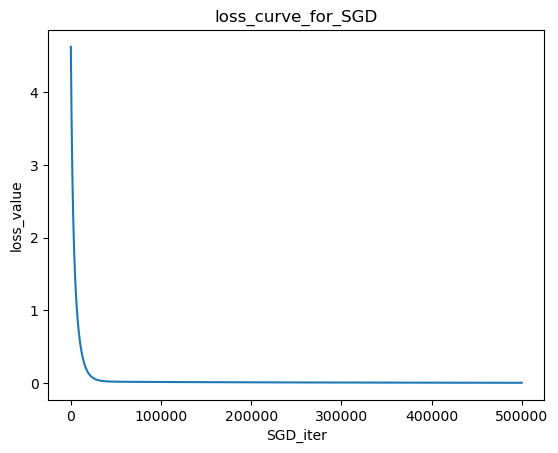

In [10]:
itertation = 50000
eta = 0.005
# SGD 梯度下降

W = np.random.rand(k+1,1)
# 计算X，Y
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,D])
XT = np.power(x, e)
X = np.transpose(XT)

# a = np.matmul(XT, X) 
# b = np.matmul(XT, Y) 
loss = []
for epoch in range(itertation):
    for j in range(D):
        x_j = XT[:,j:j+1] 
        a = np.matmul(XT, X) 
        b = np.matmul(XT, Y) 
        partial_W = eta * (a @ W - b)
        W = W - eta * partial_W
        loss.append((1/2) *np.linalg.norm(X @ W-Y,ord=2)**2)
        
# 计算SGD损失情况
index_ = np.arange(itertation*D)
plt.title('loss_curve_for_SGD')
plt.plot(index_,loss)
plt.xlabel('SGD_iter')
plt.ylabel('loss_value')

In [ ]:
# 绘图部分
order = np.arange(k+1)
order = order[:, np.newaxis]
e = np.tile(order, [1,100])

plot_x = np.linspace(-1,1,100)
plot_XT = np.power(plot_x, e)
plot_y = W.T @ plot_XT


plot_y.shape,plot_x.shape

plt.figure()
plt.scatter(x[0],y[0])
plt.plot(plot_x,plot_y[0,:])

In [359]:
W

array([[ 0.01390852],
       [-0.02268209],
       [ 0.65342096],
       [ 0.00791083],
       [ 0.84295605],
       [ 0.28614834],
       [ 0.02453607],
       [ 0.42399392],
       [ 0.32329028],
       [ 0.41351935],
       [ 0.25809822]])